In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

/home/ubuntu/anaconda3/envs/smartpot/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 딸기

In [2]:
s_no = pd.read_csv('./data/raw_csv/딸기_정상_수정완료.csv')
s_di = pd.read_csv('./data/raw_csv/딸기_질병_수정완료.csv')

display(s_no.head())
display(s_di.head())

,image,disease,area,grow,crop,points
0,V006_77_0_00_04_01_13_0_b02_20201203_0000_S01_...,0,1,5,4,"[{'xtl': 1003, 'ytl': 1167, 'xbr': 2255, 'ybr'..."
1,V006_77_0_00_04_01_13_0_b02_20201203_0001_S01_...,0,1,4,4,"[{'xtl': 600, 'ytl': 1087, 'xbr': 1628, 'ybr':..."
2,V006_77_0_00_04_01_13_0_b02_20201203_0002_S01_...,0,1,5,4,"[{'xtl': 1003, 'ytl': 1217, 'xbr': 2503, 'ybr'..."
3,V006_77_0_00_04_01_13_0_b02_20201203_0003_S01_...,0,1,4,4,"[{'xtl': 662, 'ytl': 1252, 'xbr': 2129, 'ybr':..."
4,V006_77_0_00_04_01_13_0_b02_20201203_0004_S01_...,0,1,5,4,"[{'xtl': 370, 'ytl': 884, 'xbr': 1994, 'ybr': ..."


,image,disease,area,grow,crop,points
0,V006_77_1_07_04_01_13_1_3321w_20201229_119.jpg,7,1,4,4,"[{'xtl': 844, 'ytl': 412, 'xbr': 2852, 'ybr': ..."
1,V006_77_1_07_04_01_13_2_1886w_20201209_30.jpg,7,1,4,4,"[{'xtl': 1027, 'ytl': 621, 'xbr': 1670, 'ybr':..."
2,V006_77_1_07_04_01_13_2_3108w_20201118_2.jpg,7,1,4,4,"[{'xtl': 851, 'ytl': 3, 'xbr': 2263, 'ybr': 16..."
3,V006_77_1_07_04_01_13_2_3108w_20201210_33.jpg,7,1,4,4,"[{'xtl': 1199, 'ytl': 272, 'xbr': 2374, 'ybr':..."
4,V006_77_1_07_04_01_13_2_3248b_20201202_21.jpg,7,1,4,4,"[{'xtl': 1096, 'ytl': 673, 'xbr': 1696, 'ybr':..."


In [3]:
image_root_dir = '/home/lab38/images'
s_no_dir = os.path.join(image_root_dir,'딸기_정상')
s_di_dir = os.path.join(image_root_dir, '딸기_질병')

s_no['image'] = s_no['image'].map(lambda x : os.path.join(s_no_dir, x))
s_di['image'] = s_di['image'].map(lambda x : os.path.join(s_di_dir, x))
display(s_no.head())
display(s_di.head())

,image,disease,area,grow,crop,points
0,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,4,"[{'xtl': 1003, 'ytl': 1167, 'xbr': 2255, 'ybr'..."
1,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,4,4,"[{'xtl': 600, 'ytl': 1087, 'xbr': 1628, 'ybr':..."
2,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,4,"[{'xtl': 1003, 'ytl': 1217, 'xbr': 2503, 'ybr'..."
3,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,4,4,"[{'xtl': 662, 'ytl': 1252, 'xbr': 2129, 'ybr':..."
4,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,4,"[{'xtl': 370, 'ytl': 884, 'xbr': 1994, 'ybr': ..."


,image,disease,area,grow,crop,points
0,/home/lab38/images/딸기_질병/V006_77_1_07_04_01_13...,7,1,4,4,"[{'xtl': 844, 'ytl': 412, 'xbr': 2852, 'ybr': ..."
1,/home/lab38/images/딸기_질병/V006_77_1_07_04_01_13...,7,1,4,4,"[{'xtl': 1027, 'ytl': 621, 'xbr': 1670, 'ybr':..."
2,/home/lab38/images/딸기_질병/V006_77_1_07_04_01_13...,7,1,4,4,"[{'xtl': 851, 'ytl': 3, 'xbr': 2263, 'ybr': 16..."
3,/home/lab38/images/딸기_질병/V006_77_1_07_04_01_13...,7,1,4,4,"[{'xtl': 1199, 'ytl': 272, 'xbr': 2374, 'ybr':..."
4,/home/lab38/images/딸기_질병/V006_77_1_07_04_01_13...,7,1,4,4,"[{'xtl': 1096, 'ytl': 673, 'xbr': 1696, 'ybr':..."


In [4]:
straw = pd.concat([s_no, s_di])
print(len(straw))
straw.head()

21490


,image,disease,area,grow,crop,points
0,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,4,"[{'xtl': 1003, 'ytl': 1167, 'xbr': 2255, 'ybr'..."
1,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,4,4,"[{'xtl': 600, 'ytl': 1087, 'xbr': 1628, 'ybr':..."
2,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,4,"[{'xtl': 1003, 'ytl': 1217, 'xbr': 2503, 'ybr'..."
3,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,4,4,"[{'xtl': 662, 'ytl': 1252, 'xbr': 2129, 'ybr':..."
4,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,4,"[{'xtl': 370, 'ytl': 884, 'xbr': 1994, 'ybr': ..."


In [5]:
straw.drop(['crop'], axis=1, inplace=True)

disease
0    19679
7      955
8      856
dtype: int64

grow
1    4870
2    6573
3    5612
4    3728
5     707
dtype: int64

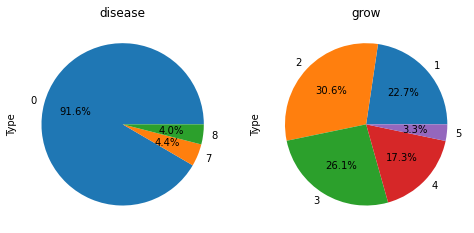

In [6]:
fig = plt.figure(figsize=(8,15))
for i,col in enumerate(['disease', 'grow']) :
    df = straw.groupby(col).size()
    display(df)
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(col)
    ax = df.plot(kind='pie',
                y = col,
                label = "Type",
                autopct='%1.1f%%')
plt.show()

In [7]:
straw.to_csv('./data/strawberry.csv', index=False)

# 상추

In [13]:
l_no = pd.read_csv('./data/raw_csv/상추_정상_라벨.csv')
l_di = pd.read_csv('./data/raw_csv/상추_질병_라벨.csv')

display(l_no.head())
display(l_di.head())

,Unnamed: 0,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points
0,0,V006_77_0_00_05_03_11_0_b04_20201119_0000_S01_...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 2034, 'ytl': 1153, 'xbr': 2436, 'ybr'..."
1,0,V006_77_0_00_05_03_11_0_b04_20201119_0001_S01_...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 1513, 'ytl': 676, 'xbr': 2325, 'ybr':..."
2,0,V006_77_0_00_05_03_11_0_b04_20201119_0002_S01_...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 1272, 'ytl': 1220, 'xbr': 2229, 'ybr'..."
3,0,V006_77_0_00_05_03_11_0_b04_20201119_0003_S01_...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 1244, 'ytl': 1326, 'xbr': 2136, 'ybr'..."
4,0,V006_77_0_00_05_03_11_0_b04_20201119_0004_S01_...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 1723, 'ytl': 1388, 'xbr': 2514, 'ybr'..."


,Unnamed: 0,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points
0,0,V006_77_1_07_05_01_13_1_2653w_20201229_109.jpg,2020/12/29,NaN,1908,4032,77,1,5,7,5,1,13,1,"[{'xtl': 618, 'ytl': 0, 'xbr': 2555, 'ybr': 951}]"
1,0,V006_77_1_09_05_02_12_2_0177e_20201022_14.jpeg,2020/10/22,NaN,3024,3024,77,1,18,9,5,2,12,2,"[{'xtl': 620, 'ytl': 1404, 'xbr': 1629, 'ybr':..."
2,0,V006_77_1_09_05_03_12_1_0149e_20201021_50.jpg,2020/10/21,NaN,3024,3024,77,1,18,9,5,3,12,1,"[{'xtl': 518, 'ytl': 1056, 'xbr': 2544, 'ybr':..."
3,0,V006_77_1_09_05_03_12_1_0149e_20201026_7.jpeg,2020/10/26,NaN,3024,4032,77,1,18,9,5,3,12,1,"[{'xtl': 1771, 'ytl': 1191, 'xbr': 3094, 'ybr'..."
4,0,V006_77_1_09_05_03_12_1_0149e_20201026_8.jpeg,2020/10/26,NaN,3024,4032,77,1,18,9,5,3,12,1,"[{'xtl': 1253, 'ytl': 2324, 'xbr': 1914, 'ybr'..."


In [14]:
l_no.columns

Index(['Unnamed: 0', 'image', 'date', 'worker', 'height', 'width', 'task',
       'type', 'region', 'disease', 'crop', 'area', 'grow', 'risk', 'points'],
      dtype='object')

In [15]:
image_root_dir = '/home/lab38/images'
l_no_dir = os.path.join(image_root_dir,'상추_정상')
l_di_dir = os.path.join(image_root_dir, '상추_질병')

l_no['image'] = l_no['image'].map(lambda x : os.path.join(l_no_dir, x))
l_di['image'] = l_di['image'].map(lambda x : os.path.join(l_di_dir, x))
display(l_no.head())
display(l_di.head())

,Unnamed: 0,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points
0,0,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 2034, 'ytl': 1153, 'xbr': 2436, 'ybr'..."
1,0,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 1513, 'ytl': 676, 'xbr': 2325, 'ybr':..."
2,0,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 1272, 'ytl': 1220, 'xbr': 2229, 'ybr'..."
3,0,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 1244, 'ytl': 1326, 'xbr': 2136, 'ybr'..."
4,0,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 1723, 'ytl': 1388, 'xbr': 2514, 'ybr'..."


,Unnamed: 0,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points
0,0,/home/lab38/images/상추_질병/V006_77_1_07_05_01_13...,2020/12/29,NaN,1908,4032,77,1,5,7,5,1,13,1,"[{'xtl': 618, 'ytl': 0, 'xbr': 2555, 'ybr': 951}]"
1,0,/home/lab38/images/상추_질병/V006_77_1_09_05_02_12...,2020/10/22,NaN,3024,3024,77,1,18,9,5,2,12,2,"[{'xtl': 620, 'ytl': 1404, 'xbr': 1629, 'ybr':..."
2,0,/home/lab38/images/상추_질병/V006_77_1_09_05_03_12...,2020/10/21,NaN,3024,3024,77,1,18,9,5,3,12,1,"[{'xtl': 518, 'ytl': 1056, 'xbr': 2544, 'ybr':..."
3,0,/home/lab38/images/상추_질병/V006_77_1_09_05_03_12...,2020/10/26,NaN,3024,4032,77,1,18,9,5,3,12,1,"[{'xtl': 1771, 'ytl': 1191, 'xbr': 3094, 'ybr'..."
4,0,/home/lab38/images/상추_질병/V006_77_1_09_05_03_12...,2020/10/26,NaN,3024,4032,77,1,18,9,5,3,12,1,"[{'xtl': 1253, 'ytl': 2324, 'xbr': 1914, 'ybr'..."


In [16]:
lett = pd.concat([l_no, l_di])
print(len(lett))
lett.head()

13932


,Unnamed: 0,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points
0,0,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 2034, 'ytl': 1153, 'xbr': 2436, 'ybr'..."
1,0,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 1513, 'ytl': 676, 'xbr': 2325, 'ybr':..."
2,0,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 1272, 'ytl': 1220, 'xbr': 2229, 'ybr'..."
3,0,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 1244, 'ytl': 1326, 'xbr': 2136, 'ybr'..."
4,0,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,2020/11/19,NaN,3024,4032,77,0,NaN,0,5,3,11,0,"[{'xtl': 1723, 'ytl': 1388, 'xbr': 2514, 'ybr'..."


In [17]:
lett.columns

Index(['Unnamed: 0', 'image', 'date', 'worker', 'height', 'width', 'task',
       'type', 'region', 'disease', 'crop', 'area', 'grow', 'risk', 'points'],
      dtype='object')

In [18]:
lett.drop(['Unnamed: 0', 'date', 'worker', 'height', 'width', 'task', 'type', 'region','crop', 'risk'], 
          axis=1, inplace=True)

In [19]:
lett.head()

,image,disease,area,grow,points
0,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,0,3,11,"[{'xtl': 2034, 'ytl': 1153, 'xbr': 2436, 'ybr'..."
1,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,0,3,11,"[{'xtl': 1513, 'ytl': 676, 'xbr': 2325, 'ybr':..."
2,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,0,3,11,"[{'xtl': 1272, 'ytl': 1220, 'xbr': 2229, 'ybr'..."
3,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,0,3,11,"[{'xtl': 1244, 'ytl': 1326, 'xbr': 2136, 'ybr'..."
4,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,0,3,11,"[{'xtl': 1723, 'ytl': 1388, 'xbr': 2514, 'ybr'..."


disease
0     10751
2         1
7         1
9      1698
10     1481
dtype: int64

grow
11     2621
12    11309
13        2
dtype: int64

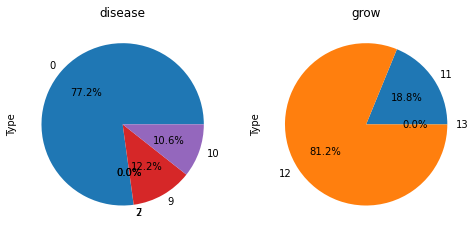

In [20]:
fig = plt.figure(figsize=(8,15))
for i,col in enumerate(list(['disease', 'grow'])) :
    df = lett.groupby(col).size()
    display(df)
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(col)
    ax = df.plot(kind='pie',
                 y = col,
                 label = "Type",
                 autopct='%1.1f%%')
plt.show()

In [21]:
lett.to_csv('./data/lettuce.csv', index=False)

# Data Balancing

## 딸기

In [2]:
ori_strawberry = pd.read_csv('./data/strawberry.csv')
ori_strawberry.head()

,image,disease,area,grow,points
0,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,"[{'xtl': 1003, 'ytl': 1167, 'xbr': 2255, 'ybr'..."
1,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,4,"[{'xtl': 600, 'ytl': 1087, 'xbr': 1628, 'ybr':..."
2,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,"[{'xtl': 1003, 'ytl': 1217, 'xbr': 2503, 'ybr'..."
3,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,4,"[{'xtl': 662, 'ytl': 1252, 'xbr': 2129, 'ybr':..."
4,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,"[{'xtl': 370, 'ytl': 884, 'xbr': 1994, 'ybr': ..."


In [3]:
aug_strawberry = pd.read_csv('./data/aug_strawberry.csv')
aug_strawberry.head()

,image,original,disease,area,grow,points
0,/home/lab38/images/딸기_증강/V006_77_1_08_04_03_13...,V006_77_1_08_04_03_13_1_3321w_20201120_17.jpg,8,3,1,"[{'xtl': 1136, 'ytl': 556, 'xbr': 3860, 'ybr':..."
1,/home/lab38/images/딸기_증강/V006_77_1_07_04_02_13...,V006_77_1_07_04_02_13_2_3248b_20201118_5.jpg,7,2,4,"[{'xtl': 421, 'ytl': 709, 'xbr': 873, 'ybr': 1..."
2,/home/lab38/images/딸기_증강/V006_77_1_07_04_02_13...,V006_77_1_07_04_02_13_1_4660w_20210104_125.jpg,7,2,4,"[{'xtl': 1641, 'ytl': 196, 'xbr': 2917, 'ybr':..."
3,/home/lab38/images/딸기_증강/V006_77_1_07_04_02_13...,V006_77_1_07_04_02_13_1_4660w_20210104_124.jpg,7,2,4,"[{'xtl': 572, 'ytl': 1449, 'xbr': 1635, 'ybr':..."
4,/home/lab38/images/딸기_증강/V006_77_1_07_04_02_13...,V006_77_1_07_04_02_13_3_1886w_20201223_70.jpg,7,2,4,"[{'xtl': 838, 'ytl': 119, 'xbr': 2892, 'ybr': ..."


In [4]:
straw = pd.concat([ori_strawberry, aug_strawberry])

In [5]:
straw['disease-grow'] = list(map(lambda x,y : str(x)+'-'+str(y), straw['disease'], straw['grow']))

In [6]:
straw['disease-grow'].unique()

array(['0-5', '0-4', '0-2', '0-3', '0-1', '7-4', '8-4', '7-5', '7-3',
       '7-2', '8-5', '8-3', '8-2', '8-1', '7-1'], dtype=object)

Strawberry


disease-grow
0-1    4224
0-2    6467
0-3    5470
0-4    2831
0-5     687
7-1      33
7-2    1100
7-3    1045
7-4    8184
7-5     143
8-1    7073
8-2      66
8-3     517
8-4    1683
8-5      77
dtype: int64

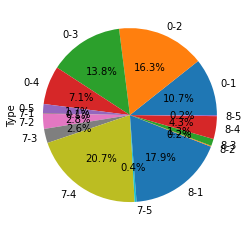

In [7]:
print('Strawberry')
df = straw.groupby('disease-grow').size()
display(df)
df.plot(kind='pie',
             y = 'disease-grow',
             label = "Type",
             autopct='%1.1f%%')
plt.show()

In [23]:
1683*0.7

1178.1

In [10]:
labels =list(straw['disease-grow'].unique())
for label in tqdm(labels) :
    print('\n', label)
    temp = straw[straw['disease-grow']==label]
    df = temp.groupby('area').size()
    print(df)


100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 232.57it/s]


 0-5
area
1    682
2      2
3      3
dtype: int64

 0-4
area
1    2744
2       1
3      86
dtype: int64

 0-2
area
1       1
2       9
3    5311
5    1146
dtype: int64

 0-3
area
1       5
2    5100
3     365
dtype: int64

 0-1
area
3    3984
5     240
dtype: int64

 7-4
area
1    1100
2    6974
3      22
5      88
dtype: int64

 8-4
area
1    759
2    539
3    308
5     77
dtype: int64

 7-5
area
1    55
2    88
dtype: int64

 7-3
area
2    550
3     22
5    473
dtype: int64

 7-2
area
2    1056
3      11
5      33
dtype: int64

 8-5
area
1    77
dtype: int64

 8-3
area
2    396
3    121
dtype: int64

 8-2
area
2    66
dtype: int64

 8-1
area
3    6864
5     209
dtype: int64

 7-1
area
3    33
dtype: int64


Drop list   
'0-4' & area = 2, '0-2' & area =1 => drop

In [11]:
drop_list = list(straw[(straw['disease-grow']=='0-4') & (straw['area']==2)].index)
drop_list += list(straw[(straw['disease-grow']=='0-2') & (straw['area']==1)].index)

In [12]:
drop_list

[4725, 617]

In [13]:
straw.drop(drop_list, inplace=True)

In [14]:
for label in tqdm(labels) :
    print('\n', label)
    temp = straw[straw['disease-grow']==label]
    df = temp.groupby('area').size()
    print(df)

100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 229.91it/s]


 0-5
area
1    682
2      2
3      3
dtype: int64

 0-4
area
1    2744
3      86
dtype: int64

 0-2
area
2       9
3    5311
5    1146
dtype: int64

 0-3
area
1       5
2    5100
3     365
dtype: int64

 0-1
area
3    3984
5     240
dtype: int64

 7-4
area
1    1100
2    6973
3      22
5      88
dtype: int64

 8-4
area
1    759
2    539
3    308
5     77
dtype: int64

 7-5
area
1    55
2    88
dtype: int64

 7-3
area
2    550
3     22
5    473
dtype: int64

 7-2
area
2    1056
3      11
5      33
dtype: int64

 8-5
area
1    77
dtype: int64

 8-3
area
2    396
3    121
dtype: int64

 8-2
area
2    66
dtype: int64

 8-1
area
3    6863
5     209
dtype: int64

 7-1
area
3    33
dtype: int64


In [28]:
result = pd.DataFrame()
labels = list(straw['disease-grow'].unique())

for label in tqdm(labels) :
    temp = straw[straw['disease-grow']==label]
    rate = 0
    if len(temp) >=1000 and len(temp)< 1500 :
        rate = 0.8
    elif len(temp) >=1500 and len(temp)< 2000 :
        rate = 0.5
    elif len(temp) >= 2000 and len(temp) < 3000 :
        rate = 0.3
    elif len(temp) >= 3000 and len(temp) < 5000 :
        rate = 0.2
    elif len(temp) >= 5000 :
        rate = 0.1        
        
    if not rate==0 :
        x_train, x_test, y_train, y_test = train_test_split(temp['image'],
                                                       temp['disease-grow'],
                                                       stratify=temp['area'],
                                                       test_size=rate)
        print(len(x_test), end=' ')
        result = result.append(straw[straw['image'].isin(x_test)])
    else :
        print(len(temp), end=' ')
        result = result.append(temp)
        
    print(label, 'done!')

100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 109.94it/s]

687 0-5 done!
849 0-4 done!
547 0-3 done!
647 0-2 done!
845 0-1 done!
819 7-4 done!
842 8-4 done!
143 7-5 done!
836 7-3 done!
880 7-2 done!
77 8-5 done!
517 8-3 done!
66 8-2 done!
708 8-1 done!
33 7-1 done!


Strawberry


disease-grow
0-1    845
0-2    647
0-3    547
0-4    849
0-5    687
7-1     33
7-2    880
7-3    836
7-4    819
7-5    143
8-1    708
8-2     66
8-3    517
8-4    842
8-5     77
dtype: int64

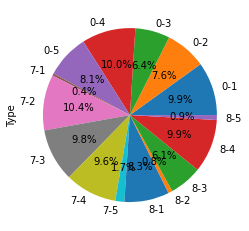

In [29]:
print('Strawberry')
df = result.groupby('disease-grow').size()
display(df)
df.plot(kind='pie',
             y = 'disease-grow',
             label = "Type",
             autopct='%1.1f%%')
plt.show()

In [81]:
result.head()

,image,disease,area,grow,points,original,disease-grow
0,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,"[{'xtl': 1003, 'ytl': 1167, 'xbr': 2255, 'ybr'...",NaN,0-5
2,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,"[{'xtl': 1003, 'ytl': 1217, 'xbr': 2503, 'ybr'...",NaN,0-5
4,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,"[{'xtl': 370, 'ytl': 884, 'xbr': 1994, 'ybr': ...",NaN,0-5
5,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,"[{'xtl': 739, 'ytl': 1184, 'xbr': 2176, 'ybr':...",NaN,0-5
7,/home/lab38/images/딸기_정상/V006_77_0_00_04_01_13...,0,1,5,"[{'xtl': 1031, 'ytl': 1271, 'xbr': 2425, 'ybr'...",NaN,0-5


In [82]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16614 entries, 0 to 17802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image         16614 non-null  object
 1   disease       16614 non-null  int64 
 2   area          16614 non-null  int64 
 3   grow          16614 non-null  int64 
 4   points        16614 non-null  object
 5   original      8397 non-null   object
 6   disease-grow  16614 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.0+ MB


In [31]:
result.to_csv('./data/small_down_sampled_strawberry.csv', index=False)

## 상추

In [32]:
ori_lettuce = pd.read_csv('./data/lettuce.csv')
ori_lettuce.head()

,image,disease,area,grow,points
0,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,0,3,11,"[{'xtl': 2034, 'ytl': 1153, 'xbr': 2436, 'ybr'..."
1,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,0,3,11,"[{'xtl': 1513, 'ytl': 676, 'xbr': 2325, 'ybr':..."
2,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,0,3,11,"[{'xtl': 1272, 'ytl': 1220, 'xbr': 2229, 'ybr'..."
3,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,0,3,11,"[{'xtl': 1244, 'ytl': 1326, 'xbr': 2136, 'ybr'..."
4,/home/lab38/images/상추_정상/V006_77_0_00_05_03_11...,0,3,11,"[{'xtl': 1723, 'ytl': 1388, 'xbr': 2514, 'ybr'..."


In [35]:
aug_lettuce = pd.read_csv('./data/raw_csv/상추_증강_라벨.csv')

image_root_dir = '/home/lab38/images'
s_dir = os.path.join(image_root_dir,'상추_증강')

aug_lettuce['image'] = aug_lettuce['image'].map(lambda x : os.path.join(s_dir, x))

aug_lettuce.head()

,image,original,disease,area,grow,points
0,/home/lab38/images/상추_증강/V006_77_1_09_05_03_12...,V006_77_1_09_05_03_12_3_0149e_20201028_3.jpeg,9,3,12,"[{'xtl': 1112, 'ytl': 0, 'xbr': 2895, 'ybr': 2..."
1,/home/lab38/images/상추_증강/V006_77_1_09_05_03_12...,V006_77_1_09_05_03_12_3_0517e_20201014_33.jpg,9,3,12,"[{'xtl': 1567, 'ytl': 624, 'xbr': 2872, 'ybr':..."
2,/home/lab38/images/상추_증강/V006_77_1_09_05_03_12...,V006_77_1_09_05_03_12_2_0517e_20201021_33.jpg,9,3,12,"[{'xtl': 87, 'ytl': 339, 'xbr': 2320, 'ybr': 2..."
3,/home/lab38/images/상추_증강/V006_77_1_10_05_03_12...,V006_77_1_10_05_03_12_2_6855e_20201210_78.jpeg,10,3,12,"[{'xtl': 31, 'ytl': 355, 'xbr': 2883, 'ybr': 2..."
4,/home/lab38/images/상추_증강/V006_77_1_09_05_03_12...,V006_77_1_09_05_03_12_3_0517e_20201110_30.jpeg,9,3,12,"[{'xtl': 1240, 'ytl': 294, 'xbr': 3317, 'ybr':..."


In [36]:
lettu = pd.concat([ori_lettuce ,aug_lettuce])
lettu['disease-grow'] = \
    list(map(lambda x,y : str(x)+'-'+str(y), lettu['disease'], lettu['grow']))

lettu['disease-grow'].unique()

array(['0-11', '9-11', '10-11', '0-12', '9-12', '2-12', '7-13', '10-12',
       '9-13'], dtype=object)

lettuce


disease-grow
0-11      2609
0-12      8142
10-11       12
10-12    14859
2-12         1
7-13        11
9-11        10
9-12     17887
9-13        11
dtype: int64

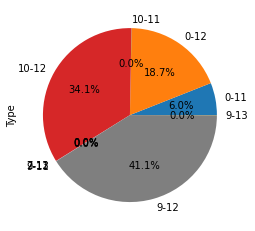

In [37]:
print('lettuce')
df = lettu.groupby('disease-grow').size()
display(df)
df.plot(kind='pie',
             y = 'disease-grow',
             label = "Type",
             autopct='%1.1f%%')
plt.show()

In [47]:
drop_list = list(lettu[lettu['disease']==2].index)
drop_list += list(lettu[lettu['disease']==7].index)
drop_list += list(lettu[lettu['grow']== 13].index)

In [48]:
lettu.drop(drop_list, inplace=True)

lettuce


disease-grow
0-11      2608
0-12      8135
10-11       12
10-12    14856
9-11        10
9-12     17885
dtype: int64

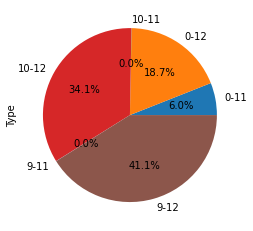

In [52]:
print('lettuce')
df = lettu.groupby('disease-grow').size()
display(df)
df.plot(kind='pie',
             y = 'disease-grow',
             label = "Type",
             autopct='%1.1f%%')
plt.show()

In [64]:
result = pd.DataFrame()
labels = list(lettu['disease-grow'].unique())

for label in tqdm(labels) :
    temp = lettu[lettu['disease-grow']==label]
    rate = 0
    if len(temp) >100 and len(temp) < 3000 :
        rate = 0.3
    elif len(temp) >= 3000 and len(temp) < 10000 :
        rate = 0.2
    elif len(temp) >= 10000 :
        rate = 0.1     
        
    if not rate==0 :
        x_train, x_test, y_train, y_test = train_test_split(temp['image'],
                                                       temp['disease-grow'],
                                                       stratify=temp['area'],
                                                       test_size=rate)
        print(len(x_test), end=' ')
        result = result.append(lettu[lettu['image'].isin(x_test)])
    else :
        print(len(temp), end=' ')
        result = result.append(temp)
        
    print(label, 'done!')

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 77.21it/s]

783 0-11 done!
10 9-11 done!
12 10-11 done!
1627 0-12 done!
1789 9-12 done!
1486 10-12 done!


lettuce


disease-grow
0-11      783
0-12     1627
10-11      12
10-12    1486
9-11       10
9-12     1789
dtype: int64

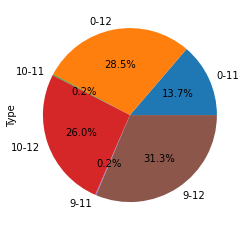

In [65]:
print('lettuce')
df = result.groupby('disease-grow').size()
display(df)
df.plot(kind='pie',
             y = 'disease-grow',
             label = "Type",
             autopct='%1.1f%%')
plt.show()

In [67]:
result.to_csv('./data/down_sampled_lettuce.csv', index=False)

In [66]:
len(result)

5707